<a href="https://colab.research.google.com/github/LohithaAdapala/MENTAL_FITNESS_TRACKER/blob/main/MENTAL_FITNESS_TRACKER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING LIBRARIES

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import sklearn

READING DATA

In [ ]:
df1=pd.read_csv("/mental-and-substance-use-as-share-of-disease.csv")

In [ ]:
df2 = pd.read_csv("/prevalence-by-mental-and-substance-use-disorder.csv")

In [ ]:
df1.head(10)

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.696670
1,Afghanistan,AFG,1991,1.734281
2,Afghanistan,AFG,1992,1.791189
3,Afghanistan,AFG,1993,1.776779
4,Afghanistan,AFG,1994,1.712986
5,Afghanistan,AFG,1995,1.738272
6,Afghanistan,AFG,1996,1.778098
7,Afghanistan,AFG,1997,1.781815
8,Afghanistan,AFG,1998,1.729402
9,Afghanistan,AFG,1999,1.850988


In [ ]:
df2.head(10)

,Entity,Code,Year,Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent),Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent),Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent),Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036
1,Afghanistan,AFG,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250
2,Afghanistan,AFG,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501
3,Afghanistan,AFG,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958
4,Afghanistan,AFG,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779
5,Afghanistan,AFG,1995,0.224713,0.716686,0.111129,4.780851,0.428578,5.098495,0.445422
6,Afghanistan,AFG,1996,0.223690,0.716388,0.107786,4.777272,0.426393,5.100580,0.444837
7,Afghanistan,AFG,1997,0.222424,0.716143,0.103931,4.775242,0.423720,5.105474,0.443938
8,Afghanistan,AFG,1998,0.221129,0.716139,0.100343,4.777377,0.422491,5.113707,0.442665
9,Afghanistan,AFG,1999,0.220065,0.716323,0.097946,4.782067,0.421215,5.120480,0.441428


In [ ]:
df1.describe(),df1.info()
df2.describe(),df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 4 columns):
 #   Column                                                                                           Non-Null Count  Dtype  
---  ------                                                                                           --------------  -----  
 0   Entity                                                                                           6840 non-null   object 
 1   Code                                                                                             6150 non-null   object 
 2   Year                                                                                             6840 non-null   int64  
 3   DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  6840 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 213.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839


(              Year  \
 count  6840.000000   
 mean   2004.500000   
 std       8.656074   
 min    1990.000000   
 25%    1997.000000   
 50%    2004.500000   
 75%    2012.000000   
 max    2019.000000   
 
        Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)  \
 count                                        6840.000000                          
 mean                                            0.281167                          
 std                                             0.047561                          
 min                                             0.191621                          
 25%                                             0.255468                          
 50%                                             0.287456                          
 75%                                             0.304760                          
 max                                             0.506018                          
 
        Prevalence - Bipolar diso

DATA VISUALIZATION

In [ ]:
df=pd.concat(objs=[df1,df2],axis=1)

<ipython-input-12-910495745933>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Figure size 1500x1200 with 0 Axes>

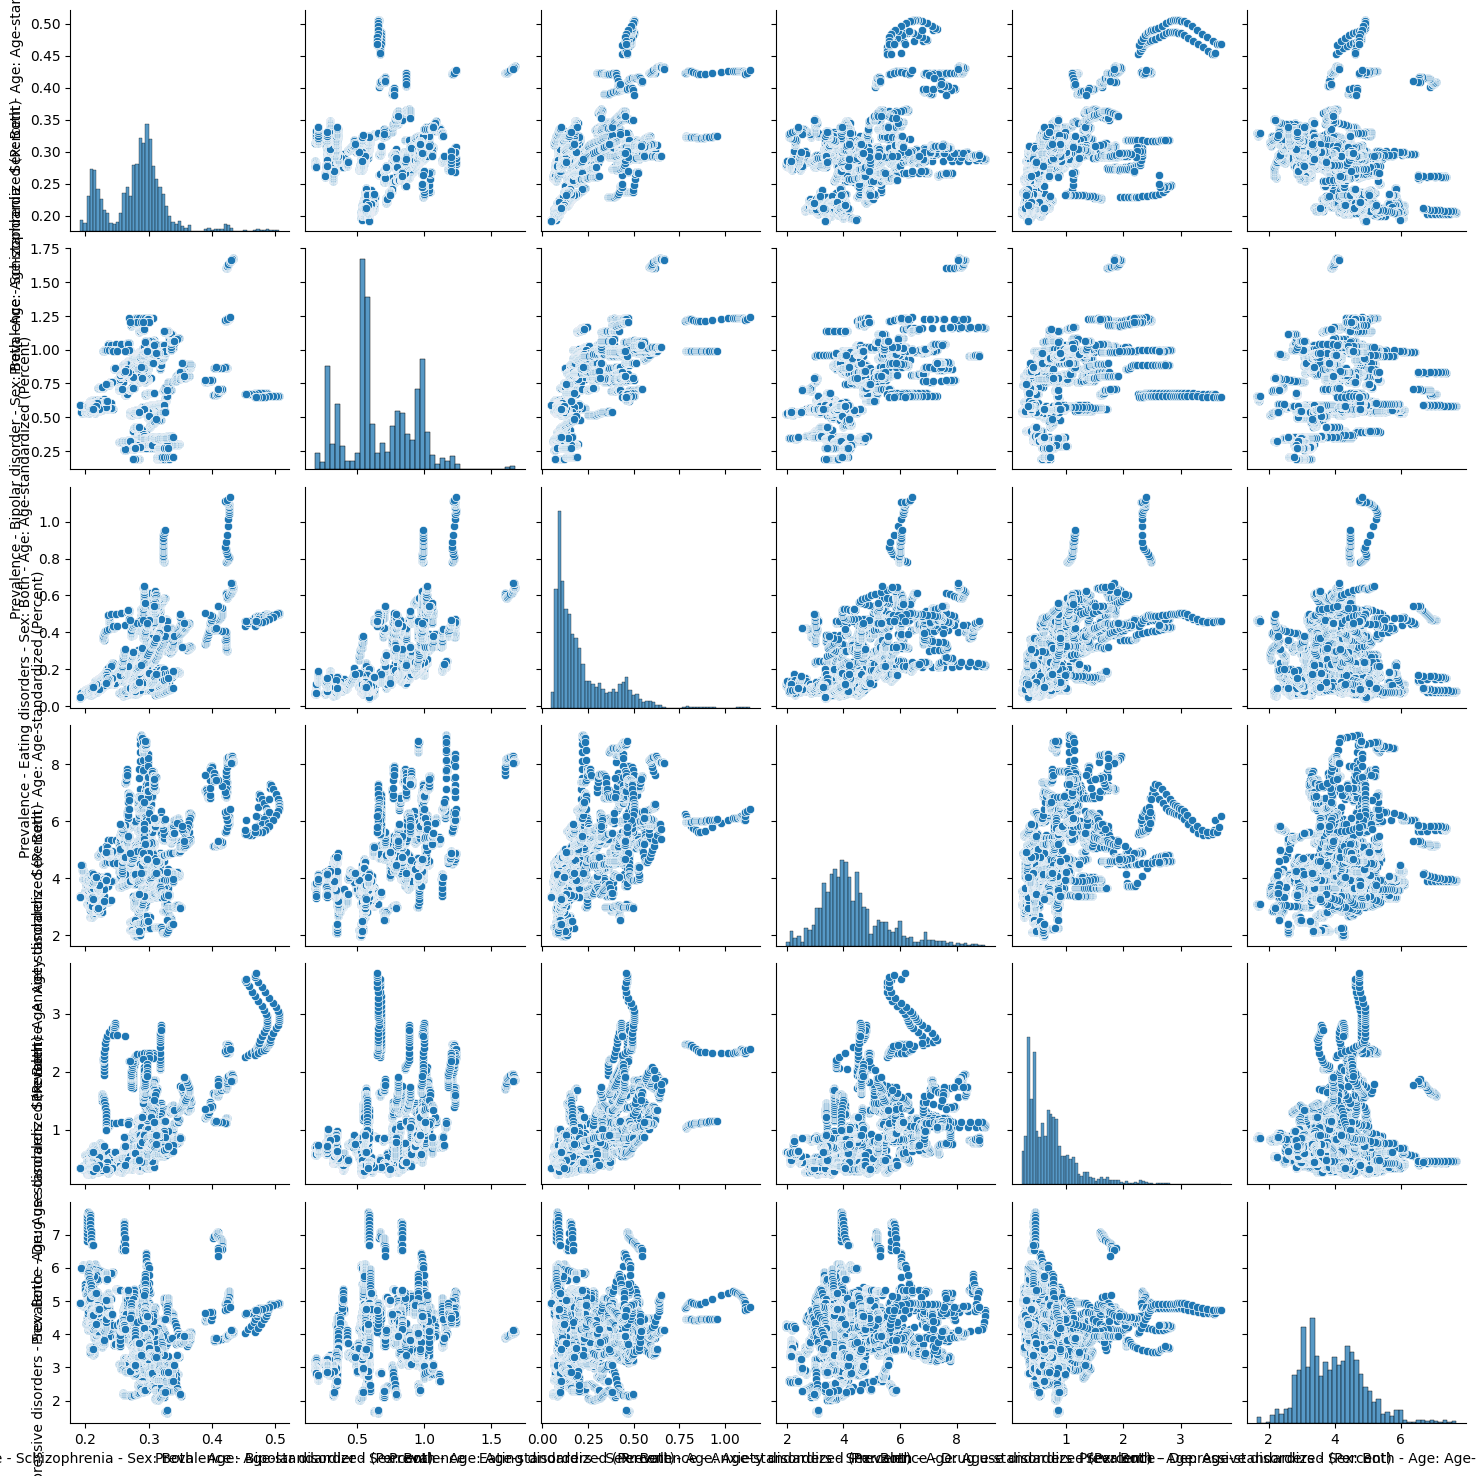

In [ ]:
corr=df.corr()
plt.figure(figsize=(15,12))
sns.pairplot(df[['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',]])

<Axes: >

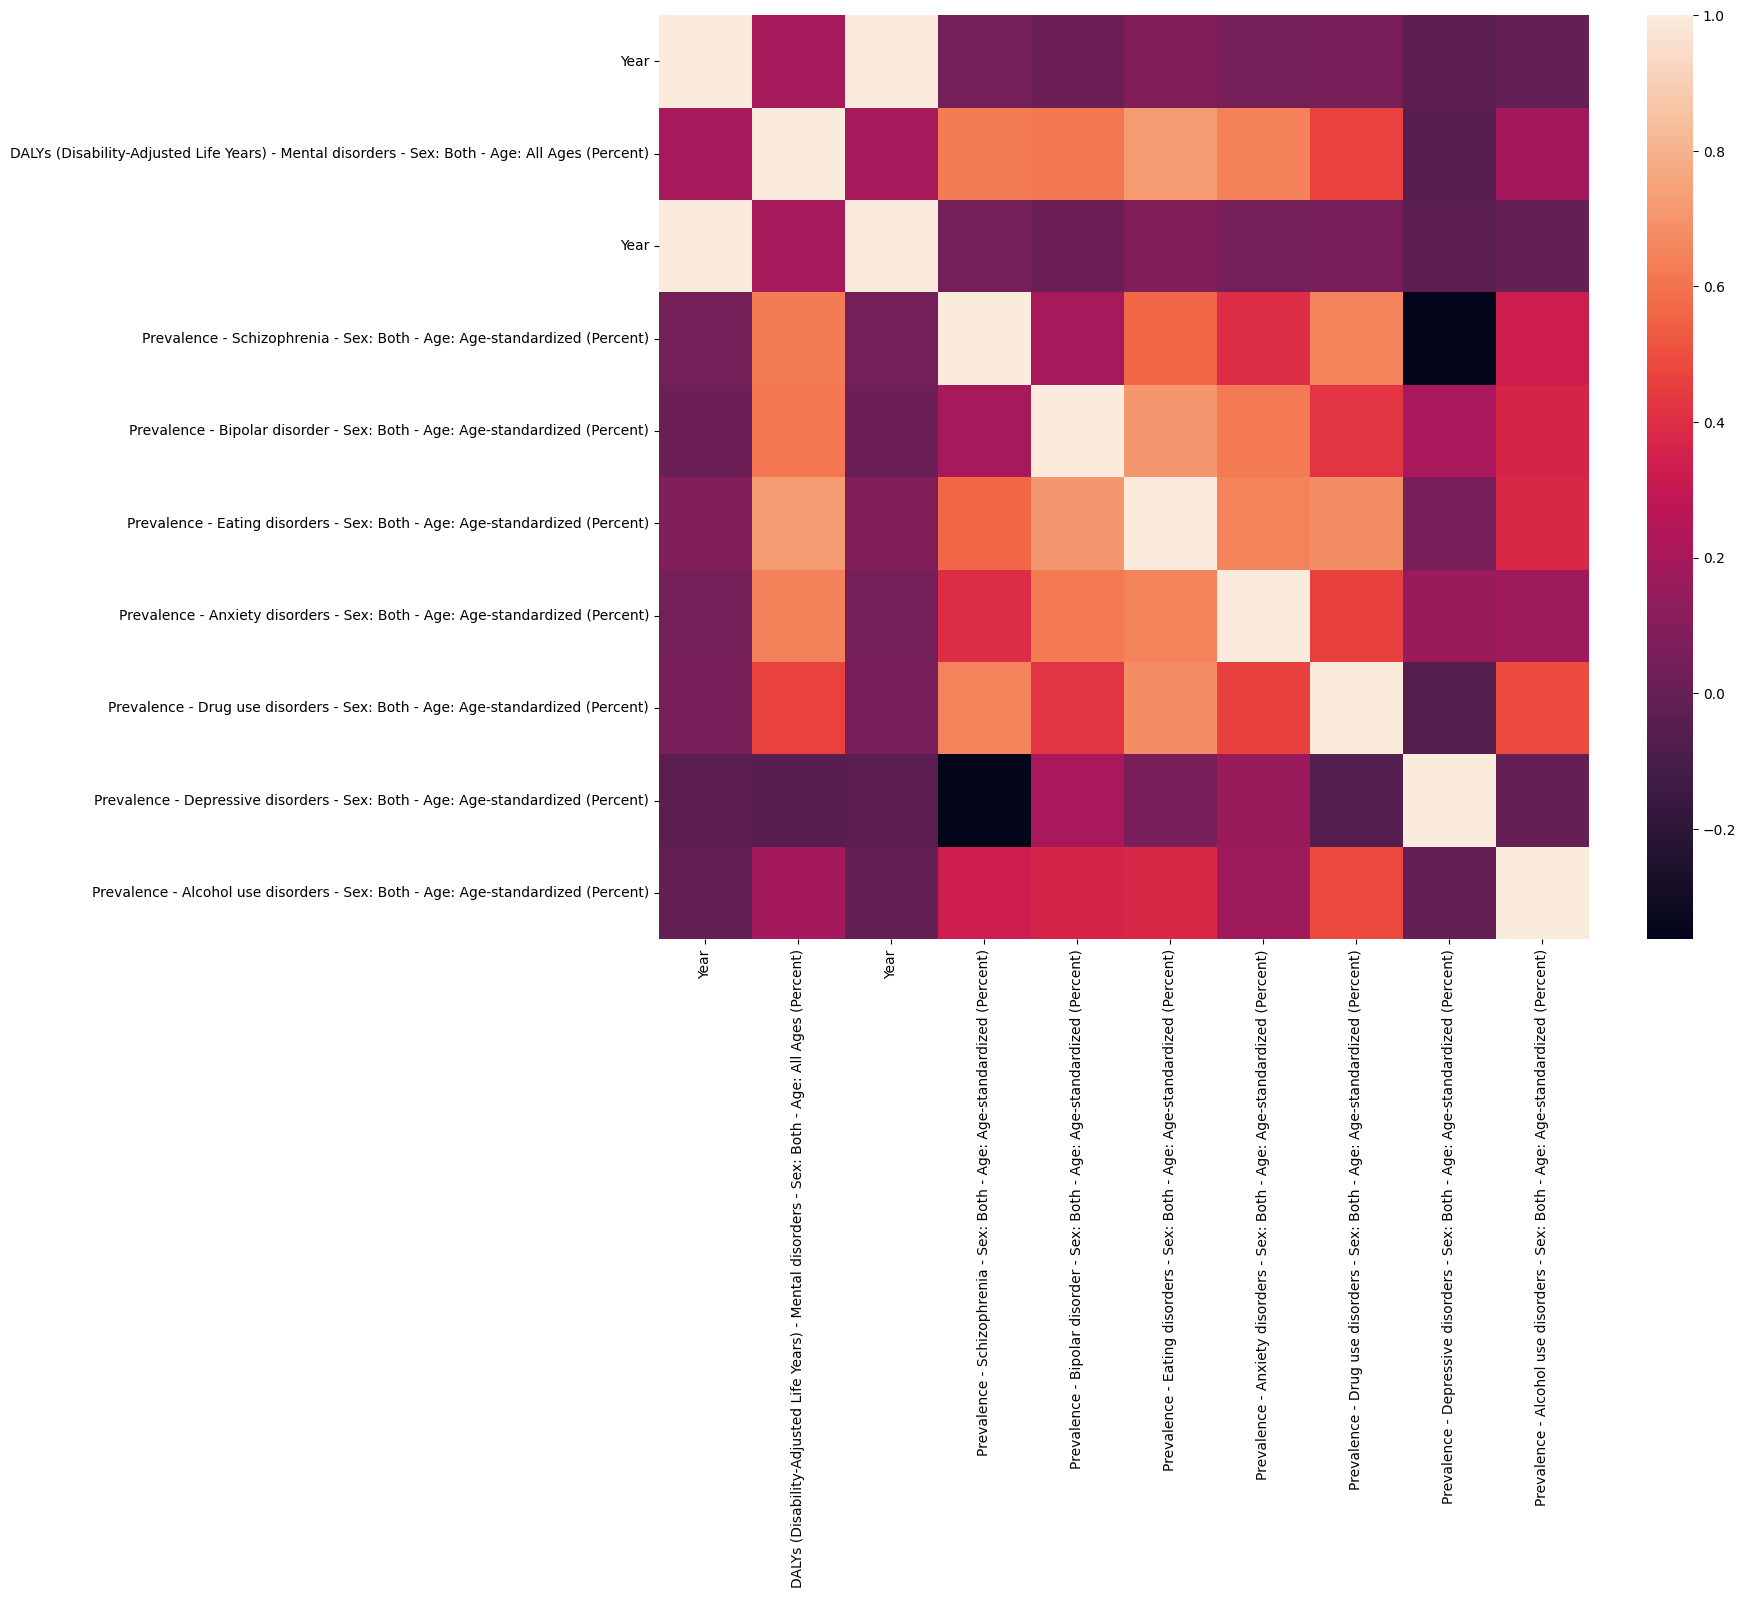

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(corr)

DATA PREPROCESSING

In [ ]:
df.drop(['Entity','Code','Year'],axis=1,inplace=True)
df=df.fillna(df.mean())

x=df[['Prevalence - Schizophrenia - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Bipolar disorder - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Eating disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Anxiety disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
       'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Percent)',]].to_numpy()

y=df[['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']].to_numpy()

In [ ]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x,y)

ML IMPLEMENTATION

In [ ]:
ml=RandomForestRegressor()
ml.fit(x_train,y_train)
predicted_values=ml.predict(x_test)

<ipython-input-16-bfcd872d59c9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ml.fit(x_train,y_train)


MODEL EVALUATION AND METRICS

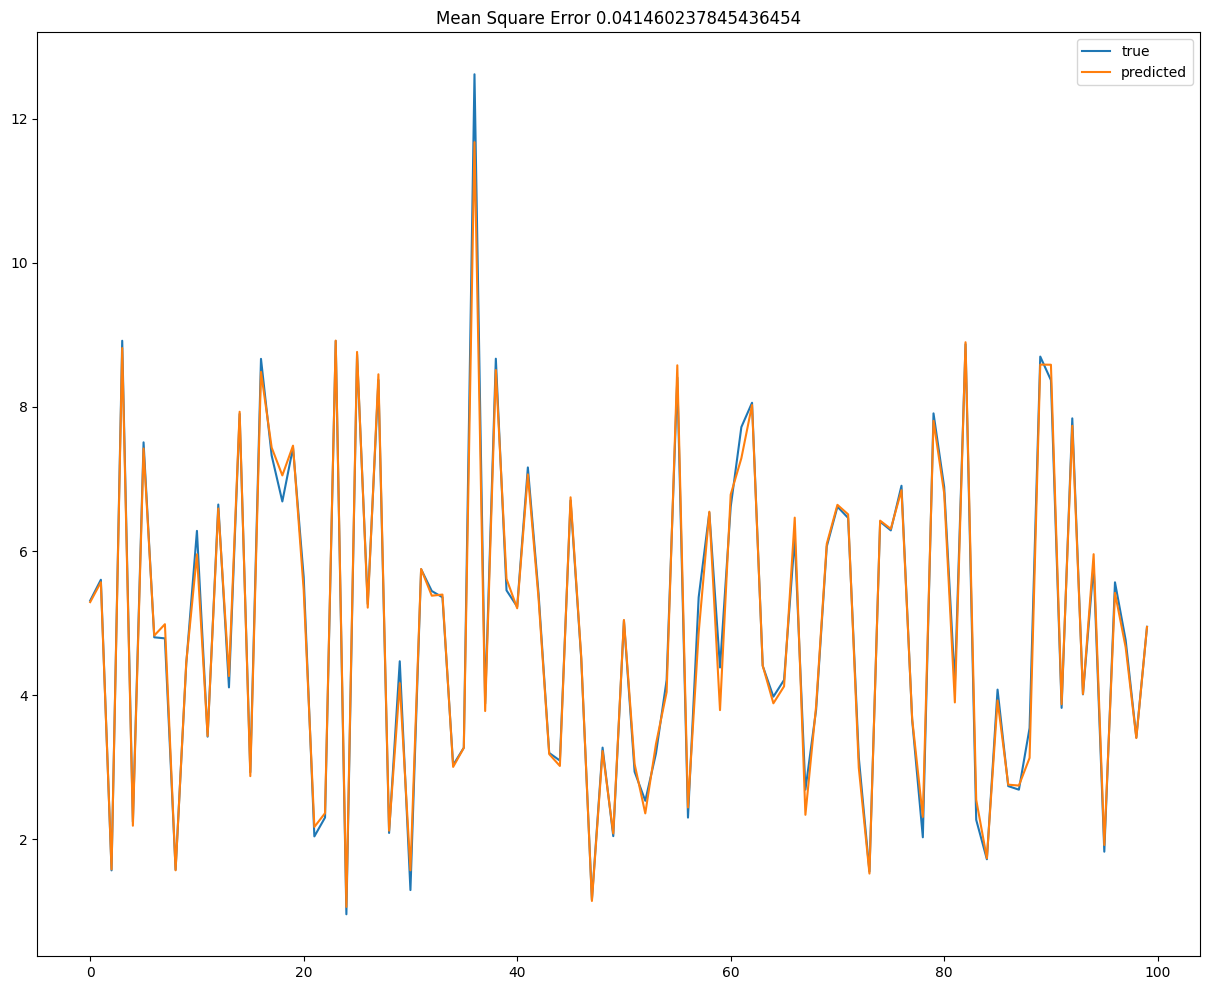

In [ ]:
plt.figure(figsize=(15,12))
plt.plot(y_test[:100])
plt.plot(predicted_values[:100])
plt.legend(['true','predicted'])
plt.title('Mean Square Error '+str(sklearn.metrics.mean_squared_error(y_test,predicted_values)))
plt.show()